In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read the input file and check the data dimension

In [33]:
df=pd.read_csv('german_credit.csv')

In [34]:
df.describe(include='all')

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
count,1000.000000,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000,...,1000.000000,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000
unique,NaN,4,NaN,5,10,NaN,5,5,NaN,4,...,NaN,4,NaN,3,3,NaN,4,NaN,2,2
top,NaN,no checking account,NaN,existing credits paid back duly till now,domestic appliances,NaN,... < 100 DM,1 <= ... < 4 years,NaN,male : single,...,NaN,"if not A121/A122 : car or other, not in attrib...",NaN,none,own,NaN,skilled employee / official,NaN,none,yes
freq,NaN,394,NaN,530,280,NaN,603,339,NaN,548,...,NaN,332,NaN,814,713,NaN,630,NaN,596,963
mean,0.300000,NaN,20.903000,NaN,NaN,3271.258000,NaN,NaN,2.973000,NaN,...,2.845000,NaN,35.546000,NaN,NaN,1.407000,NaN,1.155000,NaN,NaN
std,0.458487,NaN,12.058814,NaN,NaN,2822.736876,NaN,NaN,1.118715,NaN,...,1.103718,NaN,11.375469,NaN,NaN,0.577654,NaN,0.362086,NaN,NaN
min,0.000000,NaN,4.000000,NaN,NaN,250.000000,NaN,NaN,1.000000,NaN,...,1.000000,NaN,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
25%,0.000000,NaN,12.000000,NaN,NaN,1365.500000,NaN,NaN,2.000000,NaN,...,2.000000,NaN,27.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
50%,0.000000,NaN,18.000000,NaN,NaN,2319.500000,NaN,NaN,3.000000,NaN,...,3.000000,NaN,33.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
75%,1.000000,NaN,24.000000,NaN,NaN,3972.250000,NaN,NaN,4.000000,NaN,...,4.000000,NaN,42.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN


In [35]:
df.shape

(1000, 21)

### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [36]:
x=df.drop('default',axis=1)
y=df['default']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

In [37]:
# Lets build a Ensemble model but need to modify the dataset first

### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [38]:
x_train.shape

(500, 20)

In [39]:
test=pd.get_dummies(x_train)

In [40]:
test.shape

(500, 61)

### Check for highly correlated variables but don't required any treatment for this use case

In [41]:
test.corrwith(y_train)

duration_in_month                                                             0.168481
credit_amount                                                                 0.112683
installment_as_income_perc                                                    0.081523
present_res_since                                                            -0.024208
age                                                                          -0.068696
credits_this_bank                                                             0.005309
people_under_maintenance                                                      0.021070
account_check_status_0 <= ... < 200 DM                                        0.126237
account_check_status_< 0 DM                                                   0.256070
account_check_status_>= 200 DM / salary assignments for at least 1 year      -0.076069
account_check_status_no checking account                                     -0.311456
credit_history_all credits at this bank pai

In [42]:
test.corr()

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
duration_in_month,1.000000,0.633560,0.125790,0.060268,-0.020987,0.028593,-0.008812,0.053337,0.011076,-0.075954,...,-0.098853,-0.039695,0.178595,0.040463,-0.060669,-0.175468,-0.220075,0.220075,-0.124817,0.124817
credit_amount,0.633560,1.000000,-0.222717,0.019717,0.046235,0.057619,0.002208,0.069263,-0.008028,-0.088957,...,-0.097228,-0.028862,0.308859,-0.070887,-0.017604,-0.169534,-0.294242,0.294242,-0.049501,0.049501
installment_as_income_perc,0.125790,-0.222717,1.000000,0.071202,0.047419,0.050512,-0.061799,-0.049210,0.022086,-0.059882,...,0.044683,-0.099823,0.067860,0.020621,-0.126121,-0.036542,-0.008879,0.008879,-0.142722,0.142722
present_res_since,0.060268,0.019717,0.071202,1.000000,0.276584,0.052660,0.068628,-0.058247,0.103389,-0.052756,...,-0.352484,0.217961,-0.047037,-0.000956,0.033244,0.028801,-0.069705,0.069705,-0.046926,0.046926
age,-0.020987,0.046235,0.047419,0.276584,1.000000,0.187571,0.132660,-0.039587,-0.080391,0.046764,...,0.008911,-0.212281,0.100382,-0.182603,0.179601,0.066196,-0.152274,0.152274,0.013557,-0.013557
credits_this_bank,0.028593,0.057619,0.050512,0.052660,0.187571,1.000000,0.120565,-0.048388,-0.032667,-0.025473,...,0.002769,-0.076565,0.004540,-0.005237,0.184797,-0.062695,-0.054269,0.054269,0.033321,-0.033321
people_under_maintenance,-0.008812,0.002208,-0.061799,0.068628,0.132660,0.120565,1.000000,-0.057149,0.075420,-0.031998,...,-0.042014,-0.096540,-0.073702,-0.130118,0.043021,0.198648,-0.003278,0.003278,0.087190,-0.087190
account_check_status_0 <= ... < 200 DM,0.053337,0.069263,-0.049210,-0.058247,-0.039587,-0.048388,-0.057149,1.000000,-0.377410,-0.163307,...,0.047895,-0.074595,0.058402,-0.072183,0.030143,0.024867,0.008975,-0.008975,-0.077087,0.077087
account_check_status_< 0 DM,0.011076,-0.008028,0.022086,0.103389,-0.080391,-0.032667,0.075420,-0.377410,1.000000,-0.163307,...,-0.185643,0.163547,0.007014,-0.053778,-0.030999,0.067889,0.054860,-0.054860,0.113184,-0.113184
account_check_status_>= 200 DM / salary assignments for at least 1 year,-0.075954,-0.088957,-0.059882,-0.052756,0.046764,-0.025473,-0.031998,-0.163307,-0.163307,1.000000,...,0.001713,-0.008189,-0.038909,-0.019771,0.124880,0.011747,0.000033,-0.000033,0.052539,-0.052539


### Drop the original variables which are converted to dummy

In [43]:
x_train=pd.get_dummies(x_train,drop_first=True)

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [44]:
x=x_train
y=y_train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [45]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)
rfcl = rfcl.fit(x_train,y_train)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [46]:
y_predict = rfcl.predict(x_test)
from sklearn import metrics
print(rfcl.score(x_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict))
from sklearn.metrics import accuracy_score
print("Accuracy score =",accuracy_score(y_test, y_predict))

0.78
[[106   2]
 [ 31  11]]
Accuracy score = 0.78


### Q6 Show the list of the features importance( 1 Marks)

In [47]:
print(pd.DataFrame(rfcl.feature_importances_, columns = ["Imp"], index = x_train.columns))

                                                         Imp
duration_in_month                                   0.084024
credit_amount                                       0.104788
installment_as_income_perc                          0.045226
present_res_since                                   0.038479
age                                                 0.087441
credits_this_bank                                   0.019301
people_under_maintenance                            0.015616
account_check_status_< 0 DM                         0.033140
account_check_status_>= 200 DM / salary assignm...  0.012598
account_check_status_no checking account            0.065250
credit_history_critical account/ other credits ...  0.019956
credit_history_delay in paying off in the past      0.011115
credit_history_existing credits paid back duly ...  0.017528
credit_history_no credits taken/ all credits pa...  0.007333
purpose_business                                    0.012219
purpose_car (new)       

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [48]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc, roc_curve

In [49]:
num_folds = 10
seed = 77

In [50]:
#Validate the Random Forest model build above using k fold

In [51]:
##using the entier data
x=pd.get_dummies(x,drop_first=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
kf=KFold(n_splits=num_folds,random_state=seed)
splits=kf.split(x_train)
b_score=0
score=[]
Recall=[]
Precision=[]
for i in range(num_folds):
    foldIndices=next(splits)
    x_train,x_test=x.iloc[foldIndices[0]],x.iloc[foldIndices[1]]
    y_train,y_test=y.iloc[foldIndices[0]],y.iloc[foldIndices[1]]
    rfclmodel=rfcl.fit(x_train,y_train)
    score1=rfclmodel.score(x_test,y_test)
    score.append(score1)
    y_preds=rfclmodel.predict(x_test)
    Recall.append(recall_score(y_test, y_preds))
    Precision.append(precision_score(y_test, y_preds))
    if(score1>b_score):
        best_score=score1
        y_pred=rfclmodel.predict(x_test)
        confusion_mat=metrics.confusion_matrix(y_test,y_pred)
print("score=",score)
print("Max score=",np.max(score))

score= [0.7714285714285715, 0.8, 0.7714285714285715, 0.7714285714285715, 0.7714285714285715, 0.7142857142857143, 0.7714285714285715, 0.7714285714285715, 0.8285714285714286, 0.7142857142857143]
Max score= 0.8285714285714286


In [52]:
#Calculate Mean score

In [53]:
np.mean(score)

0.7685714285714286

In [54]:
# Calculate score standard deviation using std()

In [55]:
np.std(score)

0.03245090483314443

# Q8 Print the confusion matrix( 1 Marks)

In [56]:
print(confusion_mat)    

[[23  0]
 [10  2]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [57]:
data = {'Score': score, 'Recall': Recall,'Precision':Precision}
pd.DataFrame.from_dict(data)

,Score,Recall,Precision
0,0.771429,0.200000,1.000000
1,0.800000,0.250000,0.666667
2,0.771429,0.125000,0.500000
3,0.771429,0.200000,1.000000
4,0.771429,0.222222,0.666667
5,0.714286,0.333333,0.428571
6,0.771429,0.416667,0.833333
7,0.771429,0.125000,0.500000
8,0.828571,0.250000,1.000000
9,0.714286,0.166667,1.000000


# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [58]:
#Hint: Use roc_curve

In [59]:
from sklearn.metrics import roc_curve, auc
y_predictProb = rfclmodel.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predictProb[::,1])
roc_auc = auc(fpr, tpr)
roc_auc

0.8152173913043478

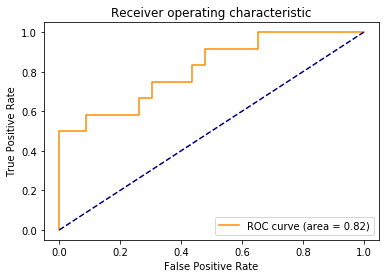

In [60]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [81]:
print("Percentage of Area under the curve =",roc_auc*100,"%")

Percentage of Area under the curve = 81.52173913043478 %


### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [73]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [77]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(x_train, y_train)
    rfcl.fit(X_, y_)
    y_pred = rfcl.predict(x_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [78]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.7485714285714286
Standard deviation:  0.02138089935299396
